In [31]:
import os, json, torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
os.chdir("output/fhir")
fL = os.listdir()

In [8]:
fil = json.load(open(fL[0]))

In [20]:
fil

{'resourceType': 'Bundle',
 'type': 'transaction',
 'entry': [{'fullUrl': 'urn:uuid:78eb437a-e81c-4897-bb5b-69e2822038b9',
   'resource': {'resourceType': 'Patient',
    'id': '78eb437a-e81c-4897-bb5b-69e2822038b9',
    'text': {'status': 'generated',
     'div': '<div xmlns="http://www.w3.org/1999/xhtml">Generated by <a href="https://github.com/synthetichealth/synthea">Synthea</a>.Version identifier: v2.5.0-32-g5503ea1\n .   Person seed: 353192652747890736  Population seed: 1580274327559</div>'},
    'extension': [{'url': 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-race',
      'extension': [{'url': 'ombCategory',
        'valueCoding': {'system': 'urn:oid:2.16.840.1.113883.6.238',
         'code': '2106-3',
         'display': 'White'}},
       {'url': 'text', 'valueString': 'White'}]},
     {'url': 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity',
      'extension': [{'url': 'ombCategory',
        'valueCoding': {'system': 'urn:oid:2.16.840.1.113883.6

In [22]:
print (fil.keys())

dict_keys(['resourceType', 'type', 'entry'])


In [24]:
filE = fil['entry']

In [25]:
filE

[{'fullUrl': 'urn:uuid:78eb437a-e81c-4897-bb5b-69e2822038b9',
  'resource': {'resourceType': 'Patient',
   'id': '78eb437a-e81c-4897-bb5b-69e2822038b9',
   'text': {'status': 'generated',
    'div': '<div xmlns="http://www.w3.org/1999/xhtml">Generated by <a href="https://github.com/synthetichealth/synthea">Synthea</a>.Version identifier: v2.5.0-32-g5503ea1\n .   Person seed: 353192652747890736  Population seed: 1580274327559</div>'},
   'extension': [{'url': 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-race',
     'extension': [{'url': 'ombCategory',
       'valueCoding': {'system': 'urn:oid:2.16.840.1.113883.6.238',
        'code': '2106-3',
        'display': 'White'}},
      {'url': 'text', 'valueString': 'White'}]},
    {'url': 'http://hl7.org/fhir/us/core/StructureDefinition/us-core-ethnicity',
     'extension': [{'url': 'ombCategory',
       'valueCoding': {'system': 'urn:oid:2.16.840.1.113883.6.238',
        'code': '2186-5',
        'display': 'Not Hispanic or Latin

In [50]:
cndtns = [ ent for ent in filE if ent["resource"]["resourceType"]  == "Condition"]

In [56]:
conditions1 = [cnd['resource']['code']['coding'][0]['display'] for cnd in cndtns]

In [57]:
conditions1

['Hypertension',
 'Prediabetes',
 'Miscarriage in first trimester',
 'Osteoarthritis of knee',
 'Viral sinusitis (disorder)',
 'Viral sinusitis (disorder)',
 'Chronic congestive heart failure (disorder)',
 'Sprain of ankle']

In [13]:
totObsList = []
for f in fL:
    print (f)
    patFile = open(f)
    try:
        patJSON = json.load(patFile)
    except:
        continue
    patEntry = patJSON['entry']
    try:
        name = patEntry[0]['resource']['name'][0]['given'][0] + " " + patEntry[0]['resource']['name'][0]['family']
    except:
        continue
    patCO2 = [(name,ent['resource']['valueQuantity']['value'],ent['resource']['effectiveDateTime']) for ent in patEntry if ent['resource']['resourceType'] =="Observation" and ent['resource']['category'][0]['coding'][0]['code']=="laboratory" and ent['resource']['code']['text'] == "Carbon Dioxide"]
    #observations = [cnd['resource']['code']['coding'][0]['display'] for cnd in patObservations]
    totObsList.append(patCO2)
    patFile.close()

Abbie917_Hoeger474_78eb437a-e81c-4897-bb5b-69e2822038b9.json
Abel832_Torphy630_fbc90ce2-2c6c-4f7c-8a59-15662d45c25d.json
Adele475_Wilkinson796_89c0b01d-9b28-4d4a-92af-26ade59c2c50.json
Adolfo777_Mante251_35098e11-c104-4555-b115-feb2d3e0e3f8.json
Adrian111_Wisozk929_4280c2e3-d78b-41af-b343-6a1f53706b05.json
Agustin437_DuBuque211_1d731012-f93a-4024-bf49-9c27710e2db6.json
Agustin437_Quitzon246_2f7aa07e-76f6-4dfb-a5f5-31a3e23bd02c.json
Alden634_Koss676_36240dfd-2c0a-49a6-a730-aa73d2149578.json
Aldo414_Wilkinson796_d4999984-ba12-4b76-90f1-ef8c84edc9dd.json
Aleta47_Ledner144_daf12330-5799-4483-af49-a6ff4345d7a7.json
Allan198_Prohaska837_23814abd-b709-4fec-88f5-e63724fb0c62.json
Alma679_Nolan344_e98a8724-98b5-4ab7-8266-1aeef578c798.json
Alvaro283_Skiles927_ad493ef6-4bac-46f1-9281-b839947e9690.json
Amalia471_Jacobi462_73cdaa32-438f-4dce-80af-c79adf46b709.json
Andra606_Rath779_adce55f5-e0b4-4776-b51c-c61bccbd008b.json
Andreas188_Bahringer146_323d5d1f-061d-4551-bf4d-2e0b443a8167.json
Angel97_Sch

Dominic463_Lubowitz58_4ed60665-cebb-4727-8933-0035b9cd19af.json
Don899_Yundt842_fee54d55-a1aa-4af7-bb8c-fff9bdaea420.json
Donovan745_Hayes766_33b55fd9-e1e3-4cec-87c3-2ff48cd38511.json
Donte636_Treutel973_5c6c0009-a761-4872-9ec8-0852a7789de1.json
Douglass930_Hahn503_c874a67b-8e6f-444a-9a5a-2e425e6ae573.json
Doyle959_Marks830_45f779b6-4dcf-4276-bf4d-07c2504730b1.json
Drew592_Effertz744_f960255b-44ac-4cf3-a1b0-5128db8dab1e.json
Drusilla108_Douglas31_4f76812a-3527-4e61-86e0-1a27cee3ef7e.json
Dudley365_Bayer639_852422aa-967f-4f68-bcaf-91822d95ed3a.json
Dudley365_Lemke654_a8e23206-4586-4cb2-b911-9a395914bf9f.json
Dudley365_Marvin195_5a9d05df-ee28-4fcd-8001-16b75645b2cc.json
Dudley365_Mayer370_f9da9eb0-2967-47f5-8777-31ea4eed46da.json
Duncan491_Nolan344_fb01baac-5a72-4186-a01d-728ef5f6278d.json
Dyan186_Brown30_1a38fbd1-cfc6-4d0d-973e-ca890bf92c4c.json
Dylan44_Upton904_050362b0-412e-444e-ac1c-718d1bfcd3c9.json
Edda876_Murazik203_adf20487-5b4a-4acd-9171-4ea652147d64.json
Edmond919_Metz686_6f08e

Johnny786_Reinger292_1afd8fff-f135-4c90-9453-3abb12f0d719.json
Jonas187_Cremin516_719aea07-1d2e-4ec2-a054-9076865f55bb.json
Jonelle857_Lowe577_68c67428-5ece-484f-bced-70007f158381.json
Jordon466_Balistreri607_e1e729a4-eda4-4b16-b0d0-13061cd92091.json
Jorge_Luis88_Osorio731_96ff5b4e-efeb-4f56-b2bf-676dedfeb454.json
Josphine206_Bauch723_e510960a-66ff-49a0-bf6f-fde3ff639055.json
Juan88_Zelaya592_8173a7d2-2dd2-4eb2-8df9-5cd2e64d0415.json
Judson999_Kuhlman484_a47054bc-206d-4d73-b813-1ece9ce59d66.json
Judson999_Schulist381_99cd39b1-0871-4efe-80c7-c8b3783ad6d2.json
Jules135_Cassin499_46b39a7b-7833-4a34-934a-b32ccf9a76cb.json
Julius90_Kuhlman484_e944c90f-ff65-4f85-bea5-a4580d5d4ea5.json
Kali995_Olson653_35d29683-09d9-4ede-92e0-f08640ee17c5.json
Kareen958_Rogahn59_61d628c9-a8e8-4877-9505-63ced511adc9.json
Keith571_Satterfield305_e481d4e9-1f7c-4787-a014-469879fc0c55.json
Kelley882_Stroman228_b66314df-0c42-4aa0-abdf-eef9b669fcfa.json
Kellye282_Schoen8_1f3c3541-dd39-45a5-8328-3bf46d57b437.json
Ken

Naida467_Kuphal363_defb02b0-6ad1-4875-9311-c96ad344e6c0.json
Nannie905_Beer512_80a23699-efb6-42e7-9a87-32fd4e50ca57.json
Nannie905_Braun514_cbf7d310-914a-4729-9929-2bfeb412f5c8.json
Nathan164_Bartoletti50_c931e49e-c30e-47d1-9065-c9a86b7226cb.json
Nathaniel596_Wyman904_8546145c-b31f-4971-aedd-c57117d7b570.json
Nicky270_Oberbrunner298_a94df75a-cf49-4eb4-89f0-bb83f1744853.json
Nicola388_Stoltenberg489_273f822e-f3d5-449f-a671-d8df6853b473.json
Norah104_Blanda868_c20941a7-955f-45f3-b0eb-e5e2c44c2c1c.json
Normand813_Wiegand701_9bc78ac4-1211-4246-ab4c-18082b818c39.json
Odilia72_Bashirian201_676c1ee0-0a5f-4d38-9c3d-20effbc666c9.json
Olin642_Feil794_1db7da5b-c9e7-4aff-bf60-b1d3efc6bd66.json
Ollie731_Emard19_3b7fd7a2-0892-4027-a837-52faf1a2d805.json
Ollie731_Thiel172_dc80114b-fb02-47c6-8766-c693be0a9675.json
Ona426_Hegmann834_fffd9c16-58bf-4dc7-a735-6138b25d3098.json
Orval846_Romaguera67_3c33dc8f-602a-4a41-8e02-42e8e476ec3c.json
Pa577_Parisian75_fc14dbfd-300b-4549-b5eb-88f2d55e71fe.json
Palmira1

Virgilio529_Okuneva707_cd8596e5-8e0d-4fbf-b2c5-3dbefdcce2bc.json
Vito638_Schaden604_375813a1-d5ca-4813-a1bf-062a54d860a1.json
Von197_Runolfsdottir785_924b74e1-8a24-4d6a-bc80-3ff9fa463c65.json
Von197_Schaden604_8f72763b-269d-4bf5-b971-05d73ed543e6.json
Wade235_Donnelly343_cf78cc34-6088-4867-8ab9-6057e584ca59.json
Wade235_Heaney114_f38d90c5-e446-48ce-851a-e0dc272e4f31.json
Walton167_Wisozk929_990aa580-5d34-4294-8624-f45101c4fa08.json
Waylon572_Brekke496_985c48e0-5cd8-46b0-8636-da59fe4c61df.json
Wes853_Buckridge80_bedceddf-2291-4050-9190-6267d371ca07.json
Whitney250_Marks830_d6e4f667-7b37-486c-a705-1798002142b4.json
Wilber603_Christiansen251_b017a333-90b7-4428-9e6f-bebc043aa95a.json
Wilbert25_Stokes453_757a9bd0-61b1-4c4c-b582-490ad12b319c.json
Wilbur107_Gutmann970_e20d3e22-e498-427b-96f3-188ee2645bd9.json
Wilbur107_Wisozk929_9d61cc8c-dab5-469d-bfdc-35e8afc4f994.json
Wilfredo622_Reichel38_79c39fdc-5df8-42b2-9538-94e7b9815f3c.json
Willia886_Shields502_d467e313-934b-481c-ace6-e559db369f2c.js

In [15]:
totObsList

[[('Abbie917 Hoeger474', 26.92, '2006-07-17T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 21.2, '2007-07-23T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 20.89, '2008-07-28T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 21.91, '2009-08-03T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 26.76, '2010-08-09T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 27.63, '2011-08-15T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 24.55, '2012-08-20T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 21.76, '2013-08-26T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 26.41, '2013-09-02T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 23.98, '2014-03-22T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 23.98, '2014-03-22T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 27.04, '2014-09-01T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 22.94, '2015-09-07T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 27.4, '2016-03-12T05:07:46+00:00'),
  ('Abbie917 Hoeger474', 27.4, '2016-03-12T05:07:46+00:00')],
 [('Abel832 Torphy630', 20.93, '1999-04-26T10:51:32+00:00'),
  ('Abel832

##### When we are trying to run this with a huge data set, we can try to filter out for common diseases such as a cold that may not affect the disease that we are analyzing 

In [18]:
avgListWName = []
for person in totObsList:
    total = 0
    for CO2Obs in person:
        total += CO2Obs[1]
    if not total == 0:
        avg = total/(len(person))
        avgList.append((CO2Obs[0],avg))


In [19]:
avgListWName

[('Abbie917 Hoeger474', 24.718),
 ('Abel832 Torphy630', 21.61),
 ('Adele475 Wilkinson796', 23.406666666666666),
 ('Adolfo777 Mante251', 21.83666666666667),
 ('Adrian111 Wisozk929', 24.70384615384616),
 ('Agustin437 DuBuque211', 24.349466666666675),
 ('Agustin437 Quitzon246', 23.842105263157894),
 ('Alden634 Koss676', 24.966086956521735),
 ('Aldo414 Wilkinson796', 22.89666666666667),
 ('Aleta47 Ledner144', 25.099333333333334),
 ('Allan198 Prohaska837', 24.483333333333334),
 ('Alma679 Nolan344', 24.367692307692305),
 ('Alvaro283 Skiles927', 24.374021739130438),
 ('Amalia471 Jacobi462', 26.72),
 ('Andra606 Rath779', 25.43),
 ('Andreas188 Bahringer146', 25.154615384615383),
 ('Angel97 Schinner682', 23.94173913043478),
 ('Angelia425 Kub800', 24.391739130434786),
 ('Angie214 Johnson679', 24.531428571428567),
 ('Antonia30 Valverde277', 24.41),
 ('Antwan357 Howell947', 23.919999999999995),
 ('Archie818 Hudson301', 23.85923076923077),
 ('Archie818 Murazik203', 23.568181818181817),
 ('Arica110 H

In [21]:
avgList = []
for person in totObsList:
    total = 0
    for CO2Obs in person:
        total += CO2Obs[1]
    if not total == 0:
        avg = total/(len(person))
        avgList.append(avg)

In [24]:
npAVL = np.array(avgList)

In [29]:
len(totObsList)

565

In [26]:
np.max(npAVL)

28.293333333333333

(array([  5.,  10.,  25.,  52., 148., 201.,  82.,  25.,  10.,   2.]),
 array([20.34      , 21.13533333, 21.93066667, 22.726     , 23.52133333,
        24.31666667, 25.112     , 25.90733333, 26.70266667, 27.498     ,
        28.29333333]),
 <a list of 10 Patch objects>)

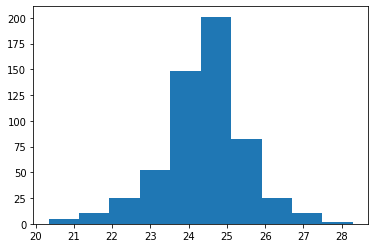

In [27]:
plt.hist(npAVL)